In [169]:
#Importing all the required libraries
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

In [191]:
#Accessing all the datasets
path=[]


#Storing the paths in a array
for i in range(1951,2023):
    path.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Data\RF25_ind{i}_rfp25.nc")

    
#Accessing all the datasets and storing all data in all_data list
all_data=[]
for i in path:
    temp = xarray.open_dataset(i)
    all_data.append(temp)




In [192]:
def selectJuneToSeptember(data,year):
    start_date = f'{year}-06-01'
    end_date = f'{year}-09-30'
    return data.sel(TIME=slice(start_date, end_date))
    

In [193]:
#Only extracting the data in between the months june to september

year = 1951
for i in range(len(all_data)):
    all_data[i] = selectJuneToSeptember(all_data[i],year)
    year += 1

In [194]:
all_data[1]['RAINFALL']

<xarray.DataArray 'RAINFALL' (TIME: 122, LATITUDE: 129, LONGITUDE: 135)>
[2124630 values with dtype=float64]
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 6.5 6.75 7.0 7.25 ... 37.75 38.0 38.25 38.5
  * TIME       (TIME) datetime64[ns] 1952-06-01 1952-06-02 ... 1952-09-30
Attributes:
    long_name:  Rainfall
    units:      mm
    history:    From ind1952_rfp25.grd

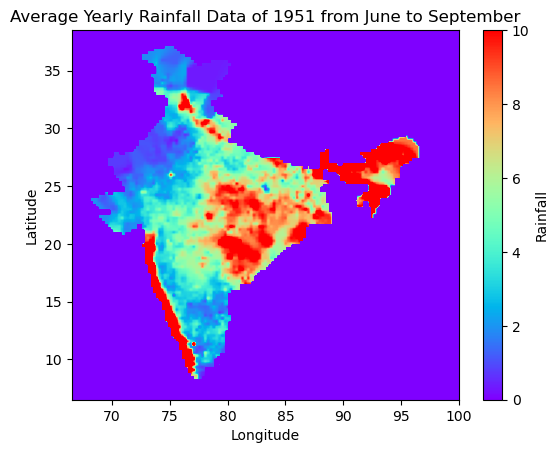

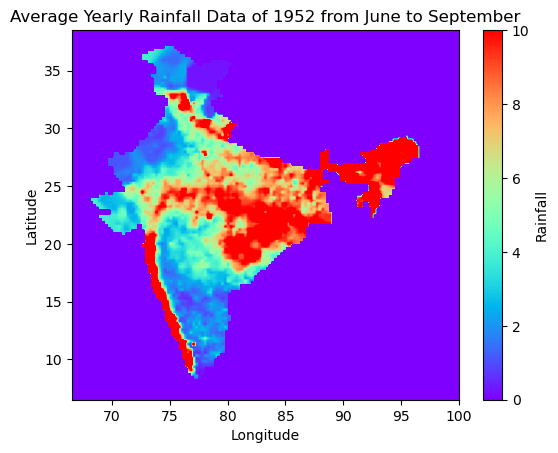

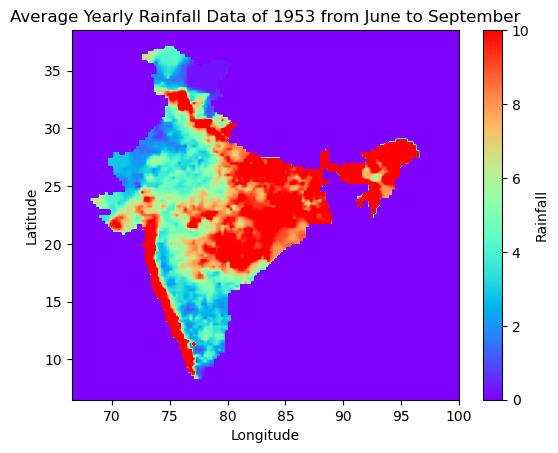

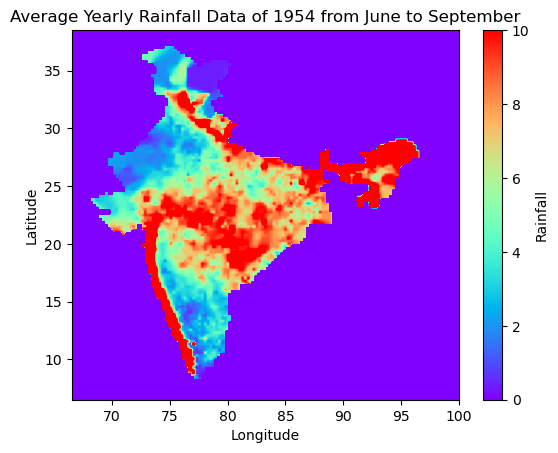

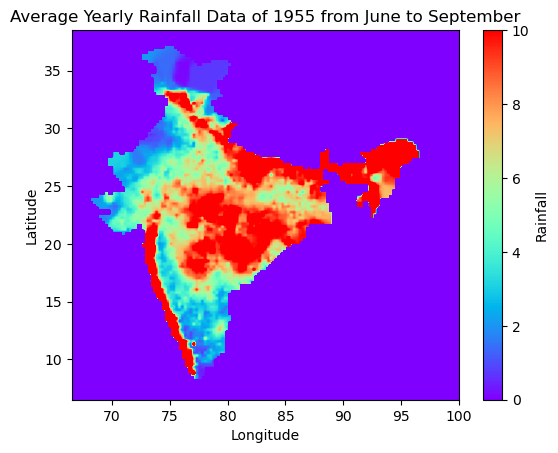

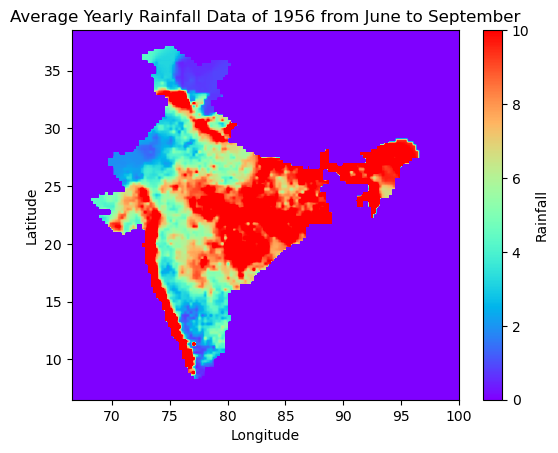

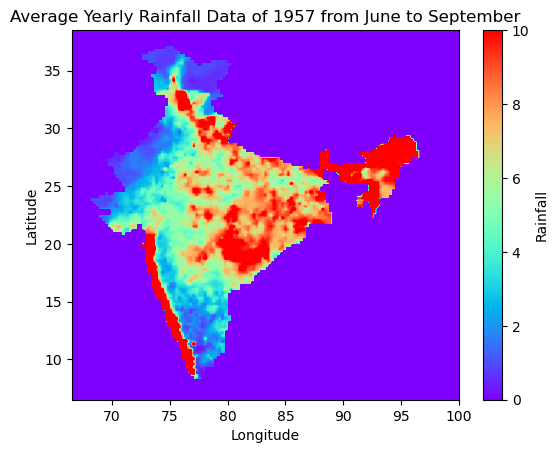

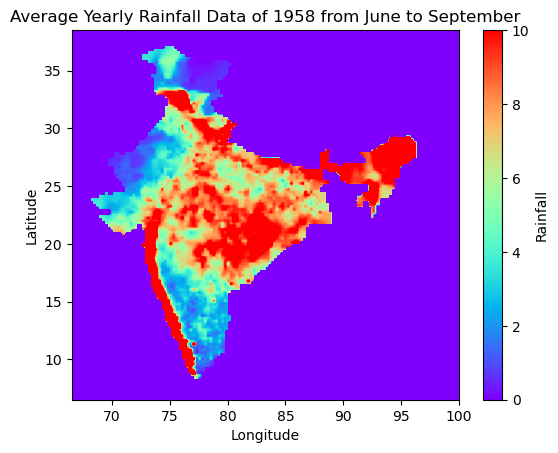

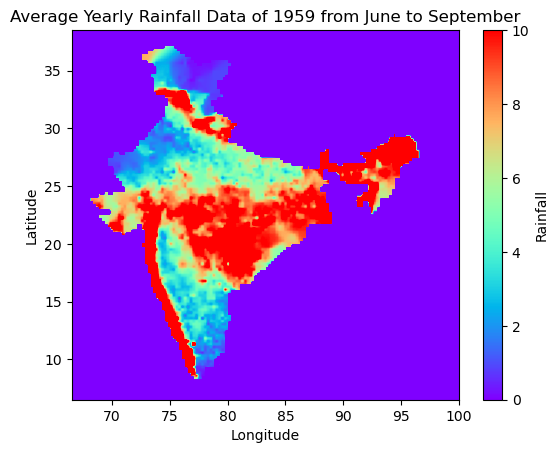

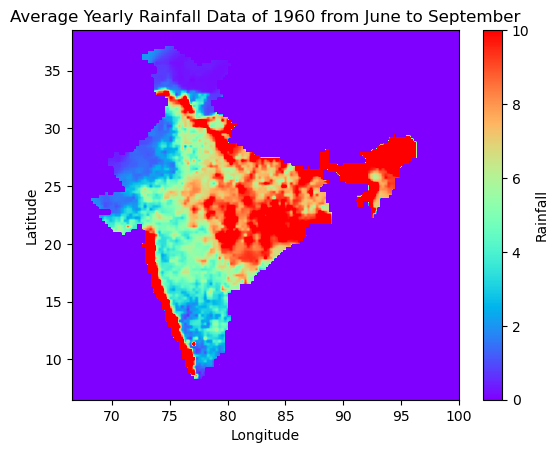

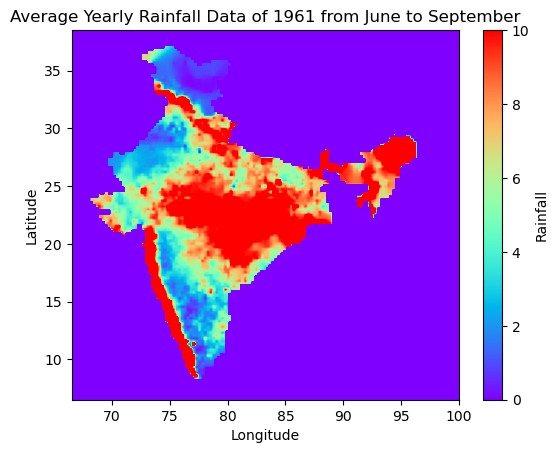

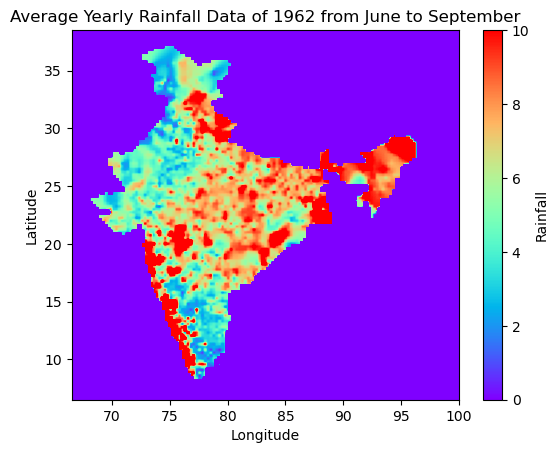

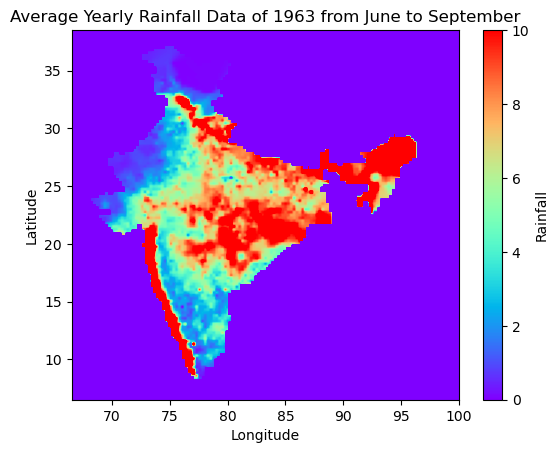

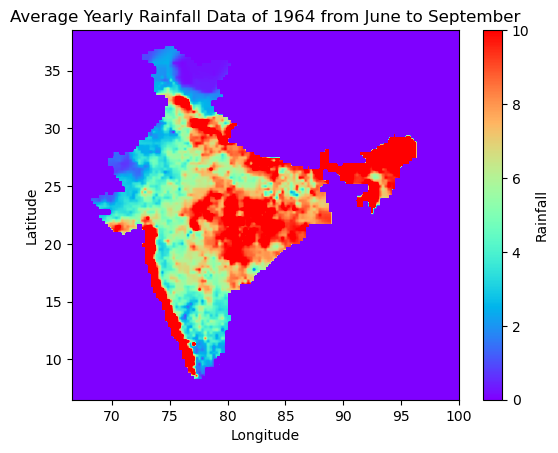

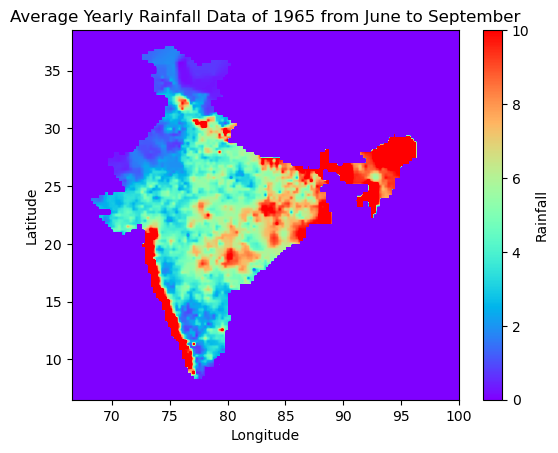

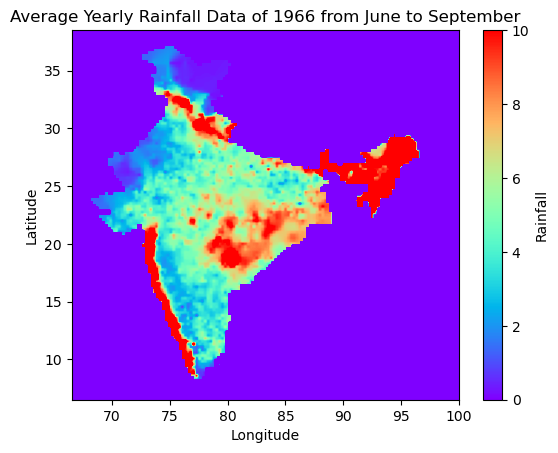

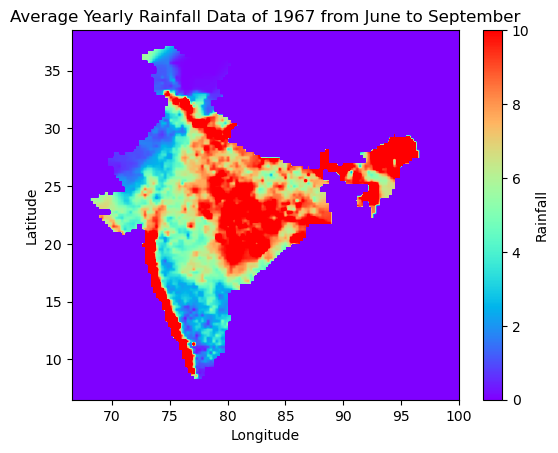

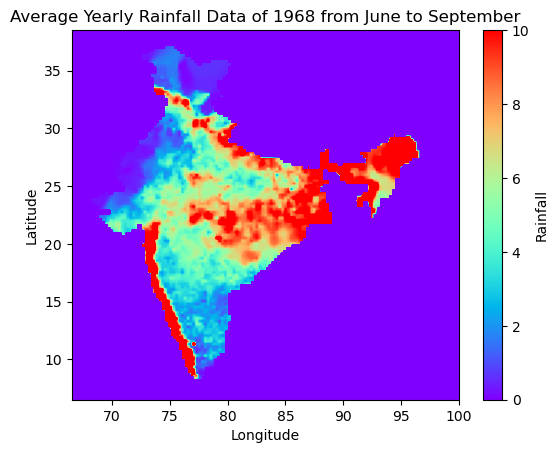

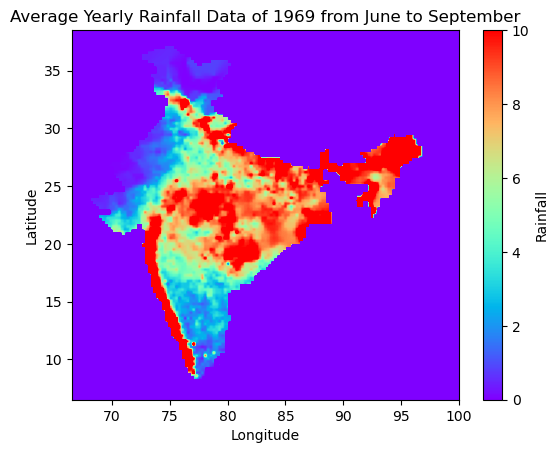

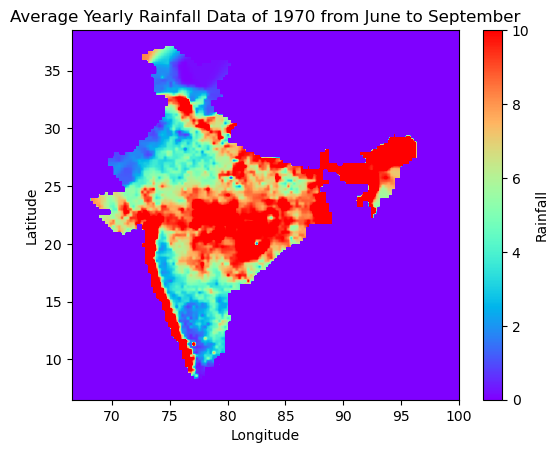

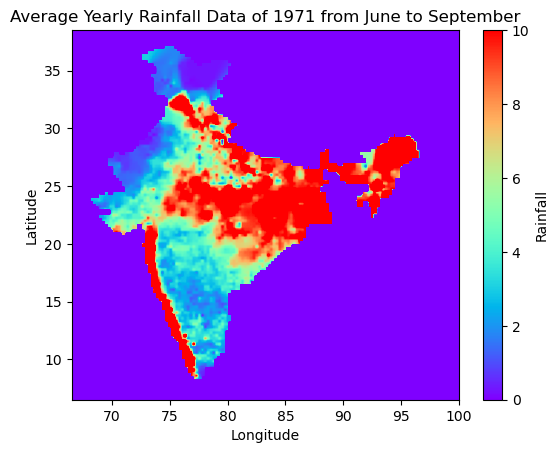

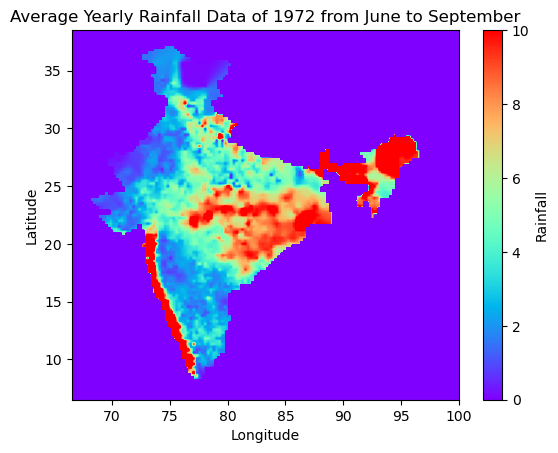

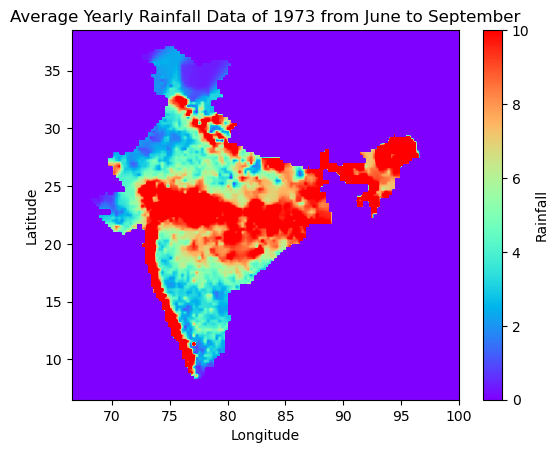

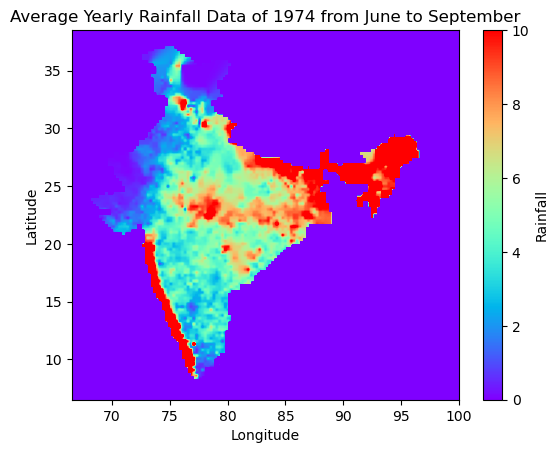

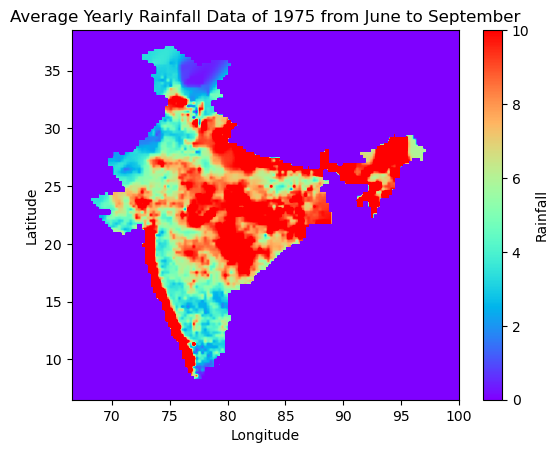

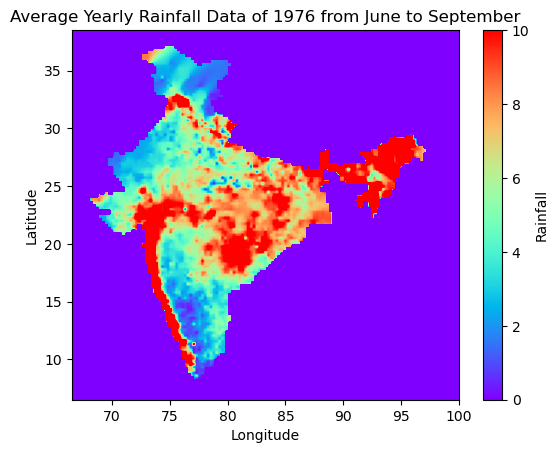

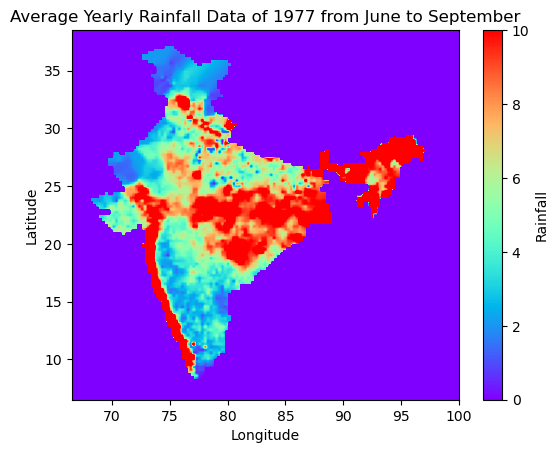

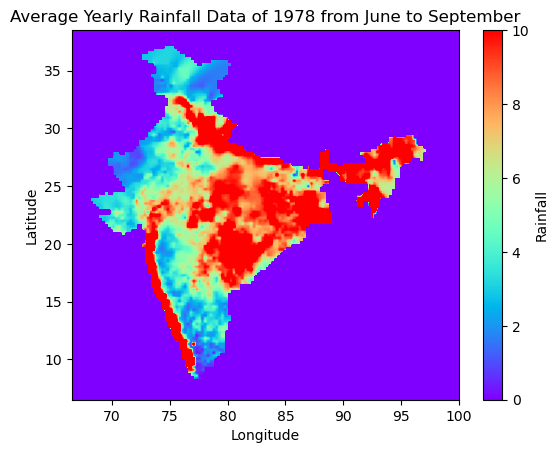

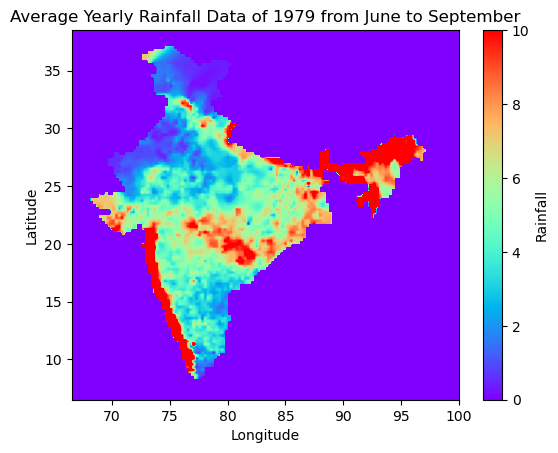

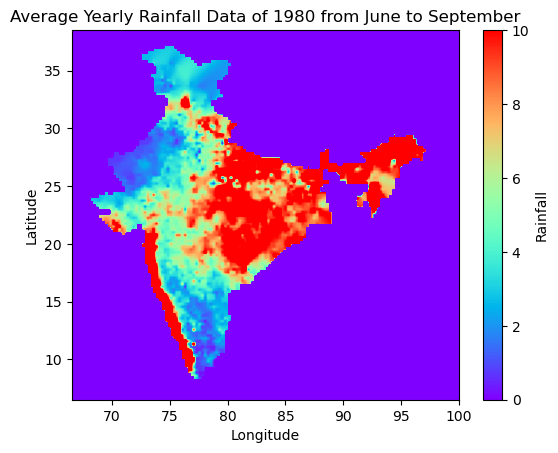

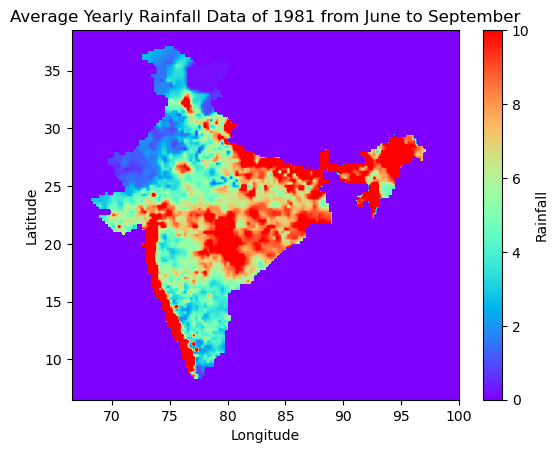

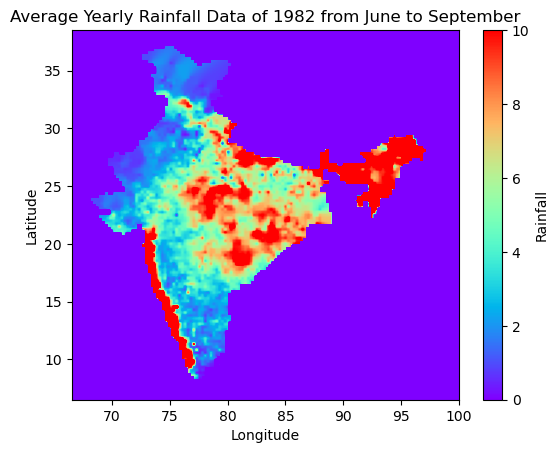

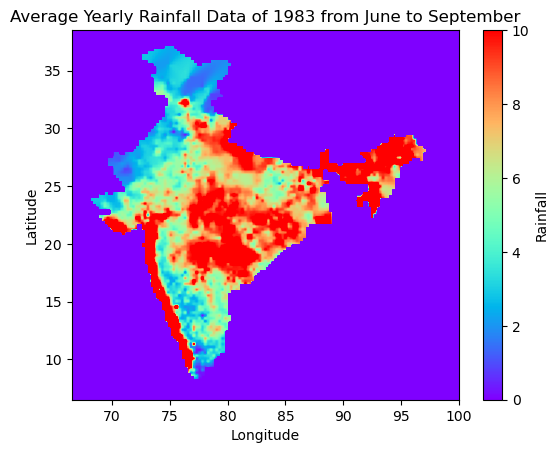

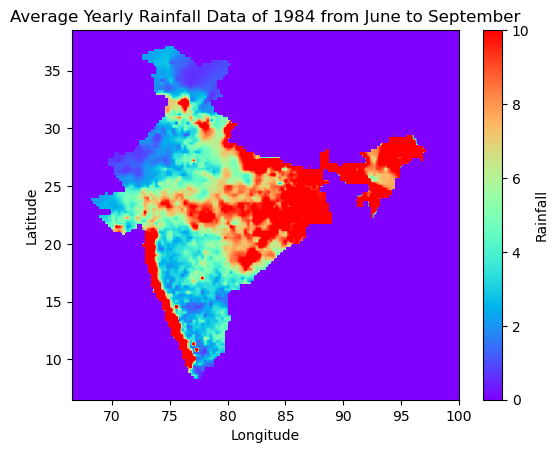

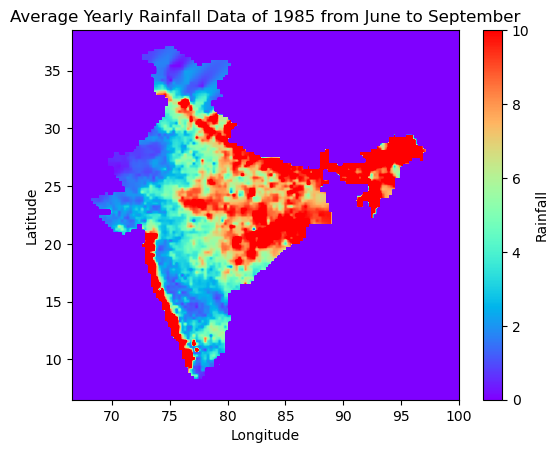

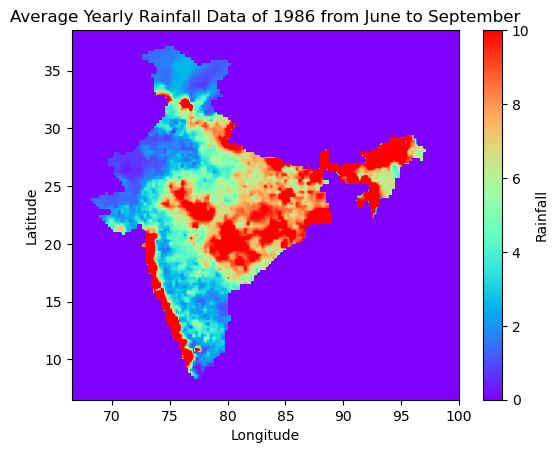

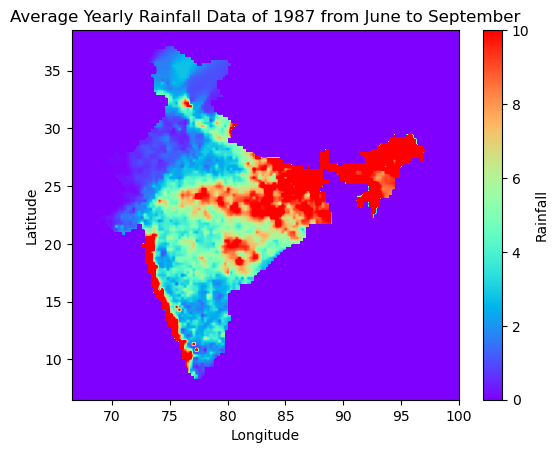

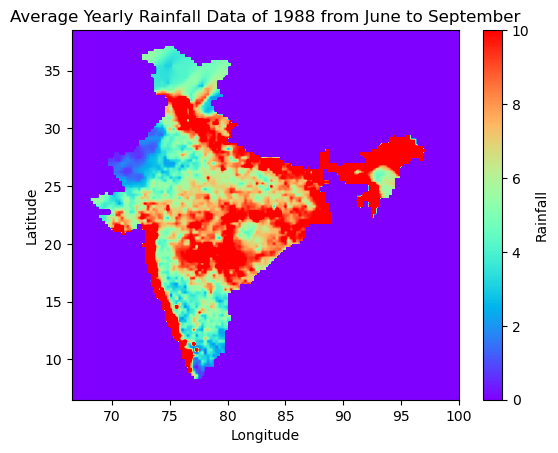

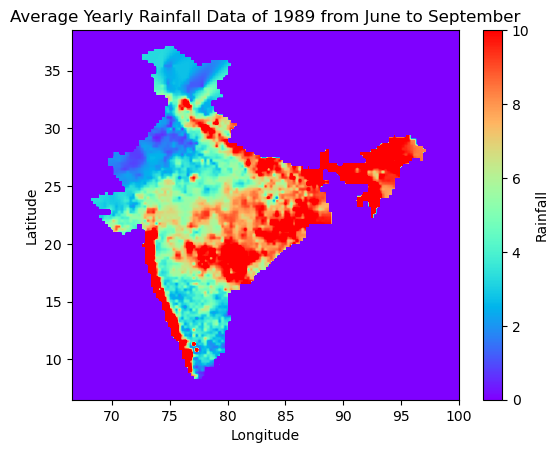

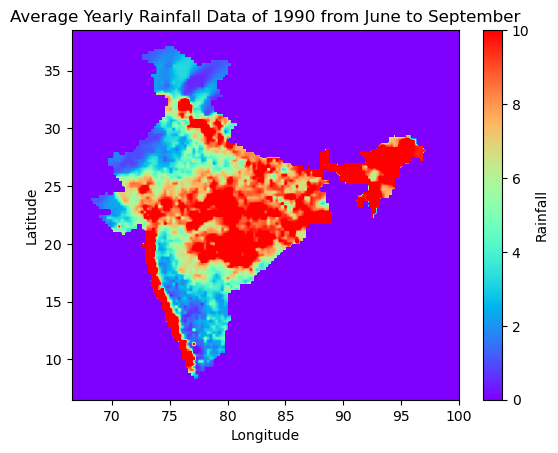

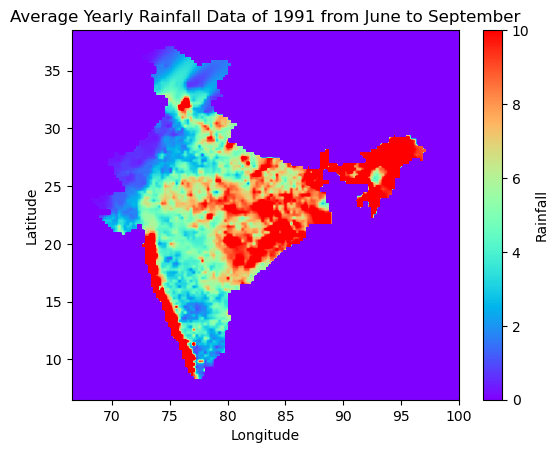

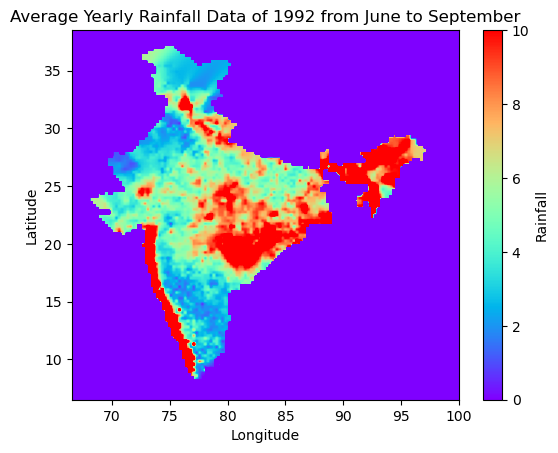

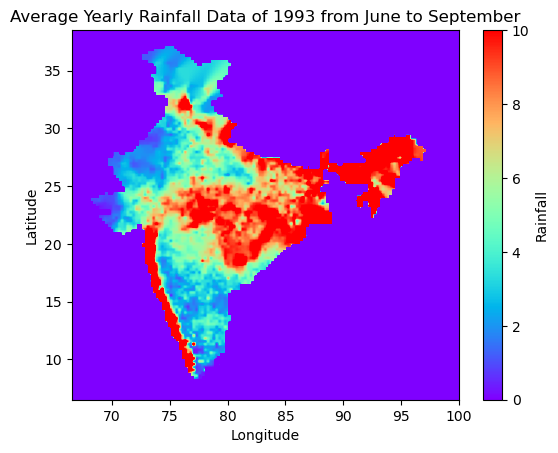

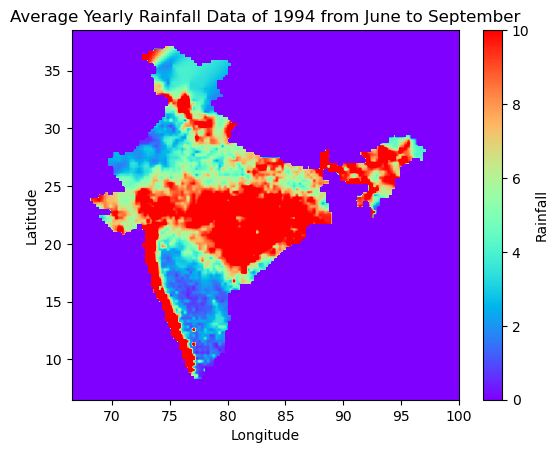

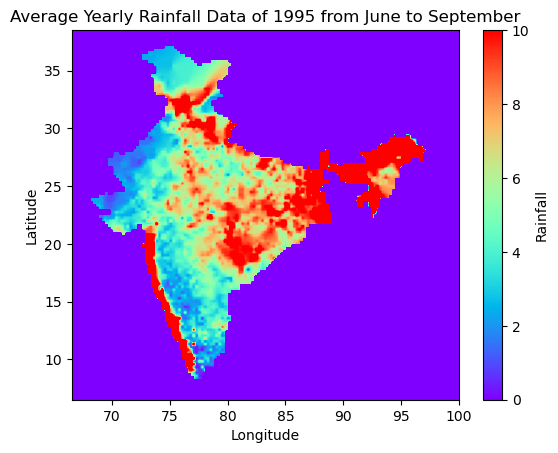

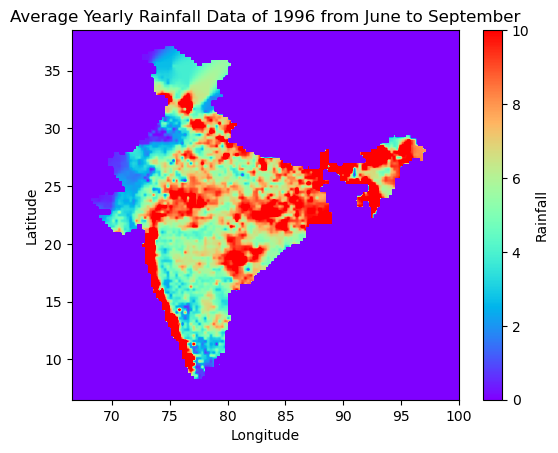

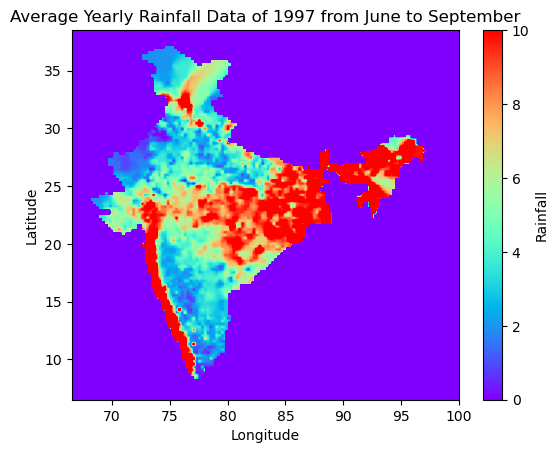

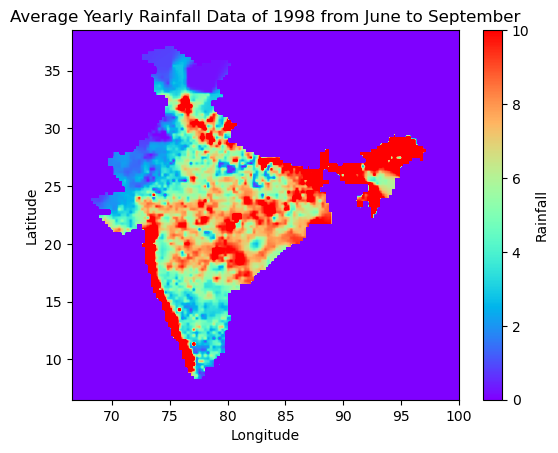

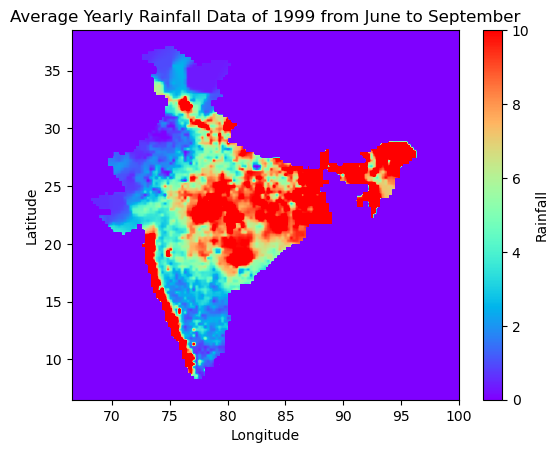

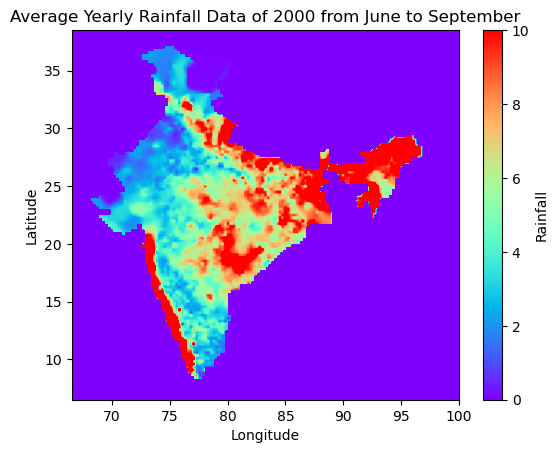

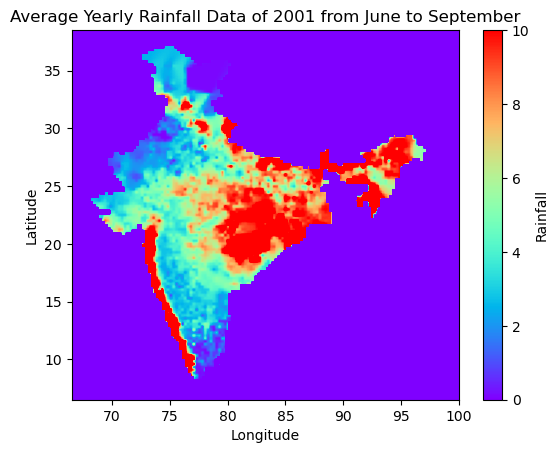

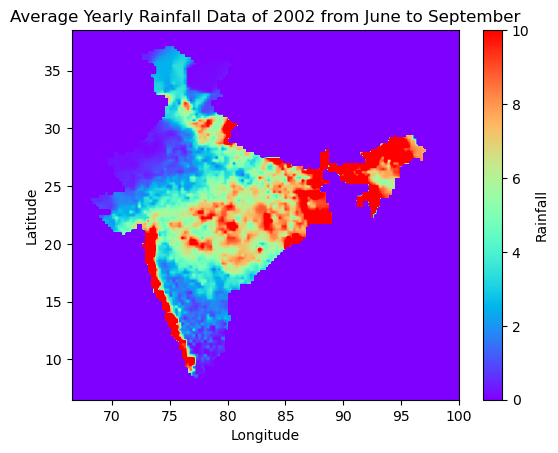

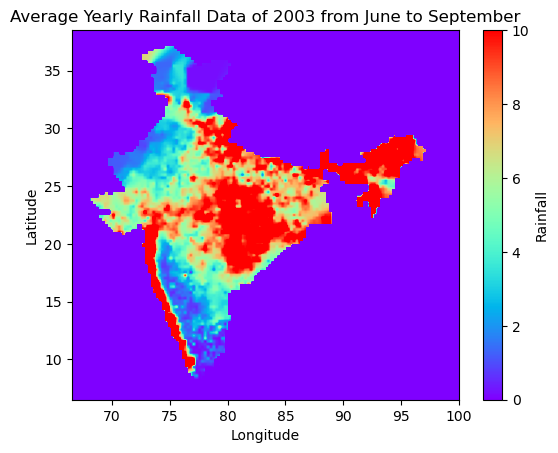

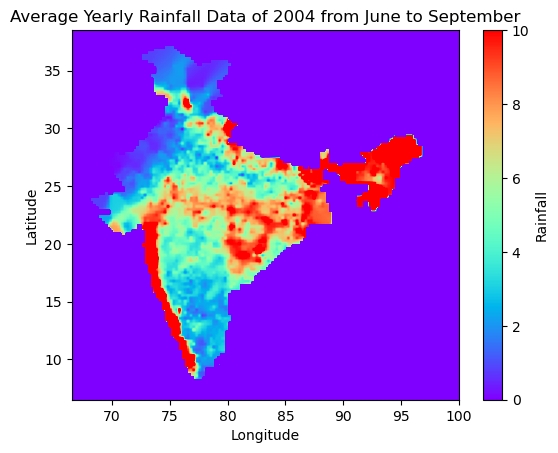

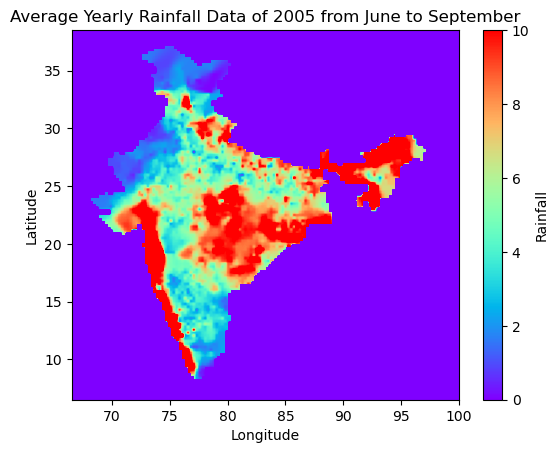

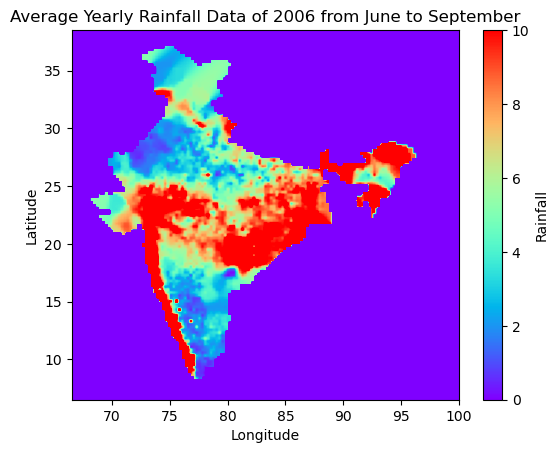

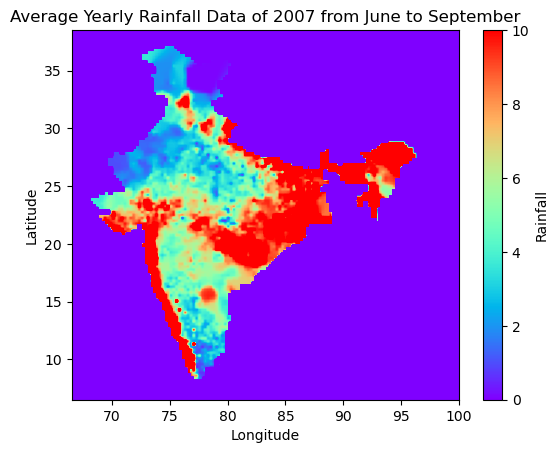

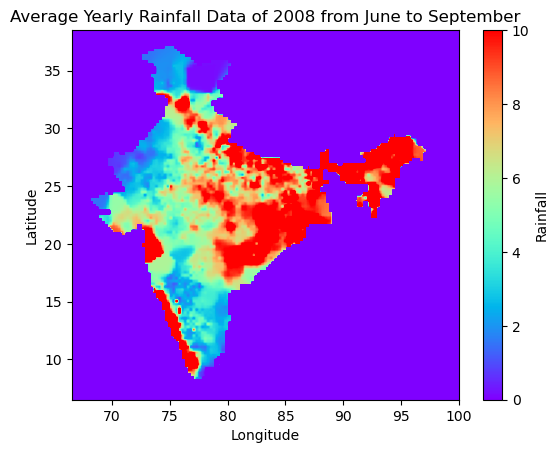

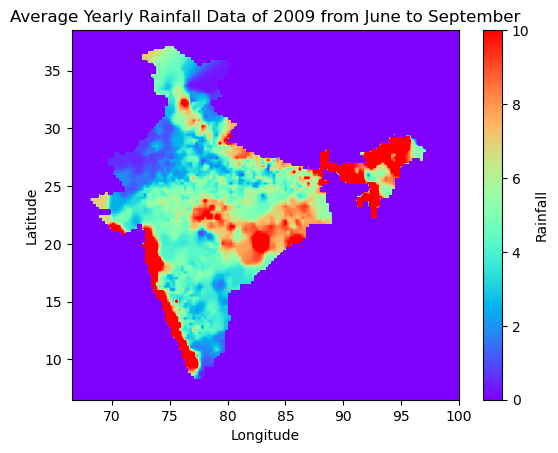

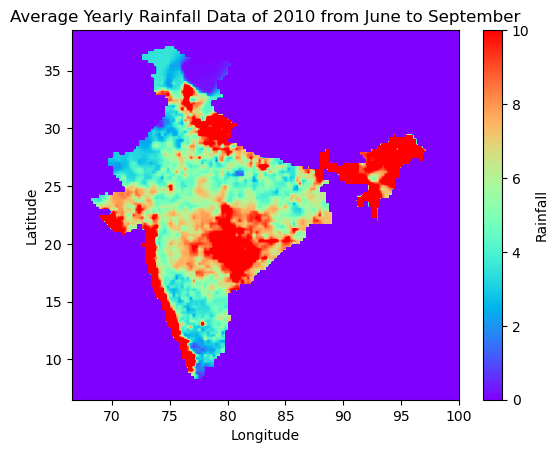

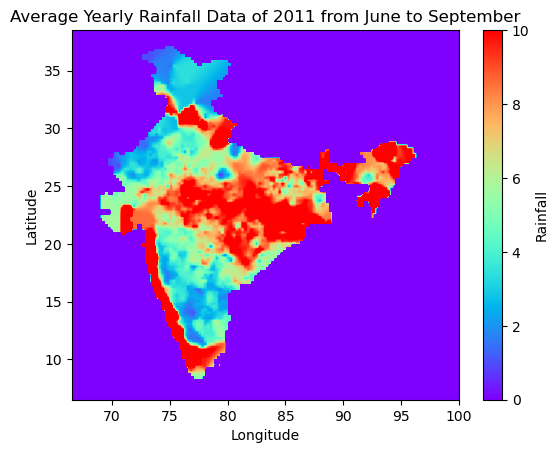

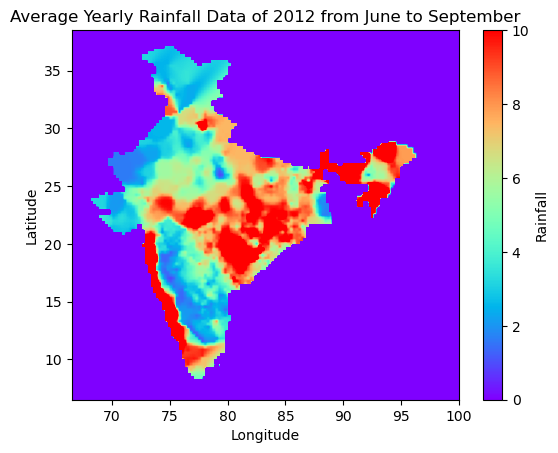

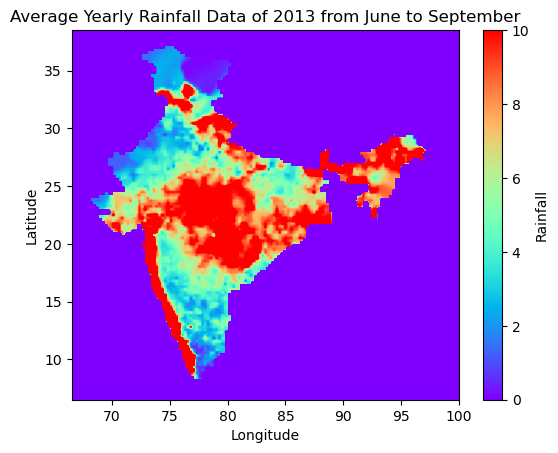

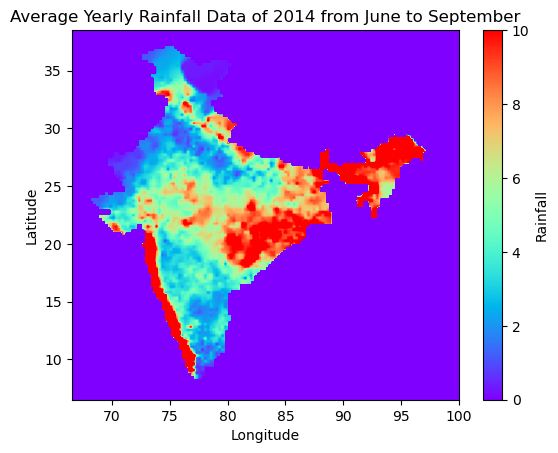

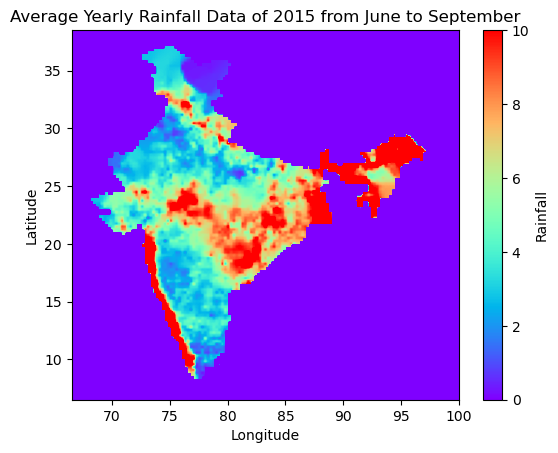

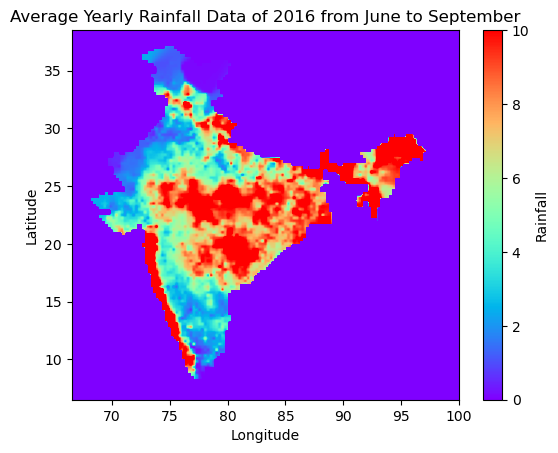

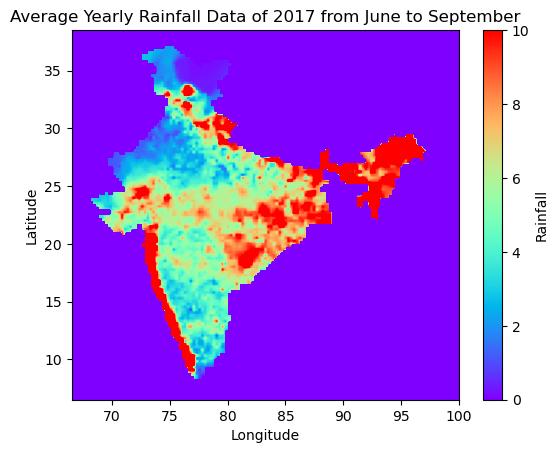

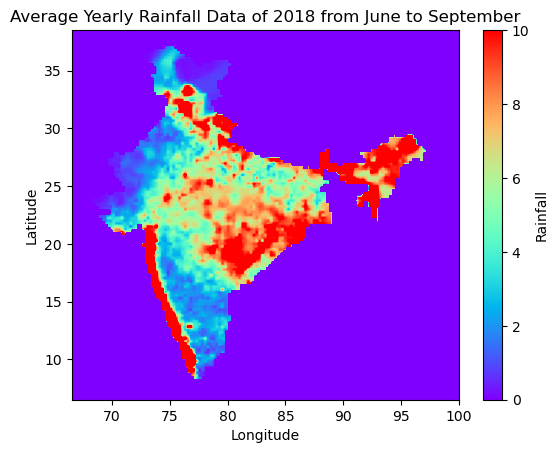

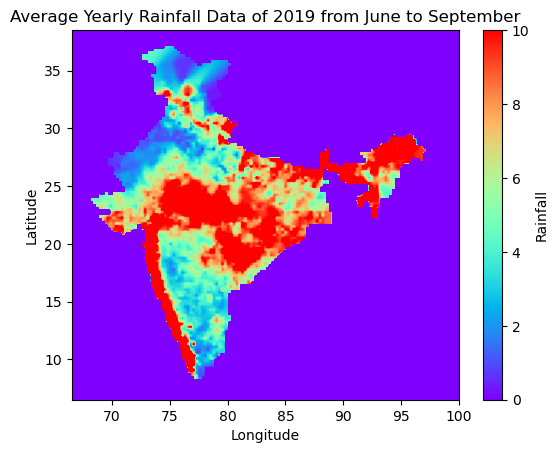

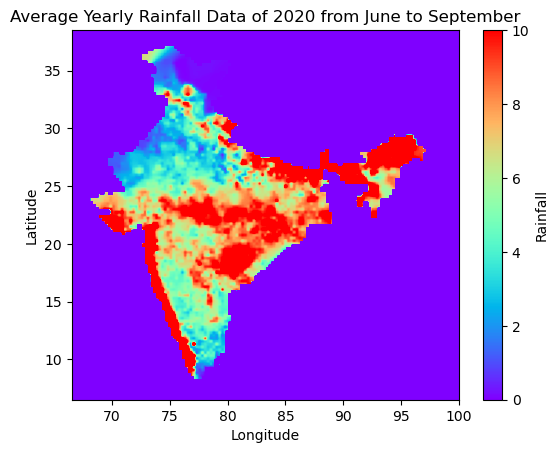

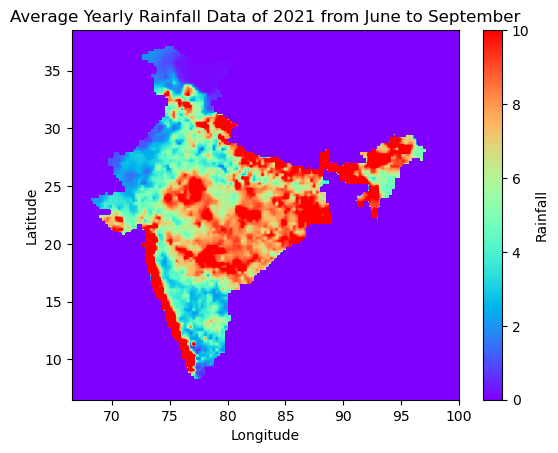

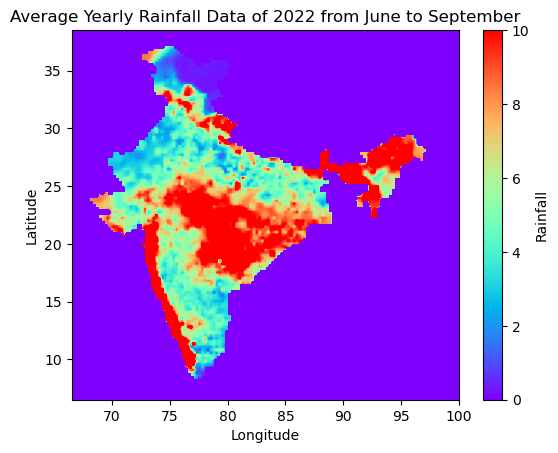

In [200]:
#Plotting the mean of every year from 1951 to 2022
yr=1951
all_data_mean=[]
inst=0
for i in all_data:
    #Extract the rainfall data variable
    rainfall_data = i['RAINFALL']
    
    # Calculate the mean rainfall over the entire year
    all_data_mean.append(rainfall_data.mean(dim='TIME'))
    
    #No nan values
    all_data_mean[inst]= all_data_mean[inst].where(all_data_mean[inst].notnull(), -999)    

    # Create a figure and axis for the plot
    fig, ax = plt.subplots()

    # Create a colormap
    cmap = plt.get_cmap('rainbow')  # You can choose any other colormap you prefer

    # Determine the appropriate color limits based on your data
    vmin = 0.0  # Minimum value for the color scale
    vmax = 10.0  # Maximum value for the color scale

    # Plot the average yearly rainfall data using the colormap
    im = ax.imshow(all_data_mean[inst], cmap=cmap, vmin=vmin, vmax=vmax, origin='lower',
                   extent=[all_data_mean[inst]['LONGITUDE'].min(), all_data_mean[inst]['LONGITUDE'].max(),
                           all_data_mean[inst]['LATITUDE'].min(), all_data_mean[inst]['LATITUDE'].max()])

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, label='Rainfall')

    # Set axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Average Yearly Rainfall Data of {yr} from June to September')
    yr+=1
    inst+=1
    # Show the plot
    plt.show()

In [ ]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
print(np.array(all_data_mean[0]))
#all_data_mean[0].shape

In [275]:
import pandas as pd
from sklearn.cluster import KMeans

#Creating a k means object with 9 clusters
km = KMeans(n_clusters=9, n_init='auto',max_iter=1000,random_state=0)
km

KMeans(max_iter=1000, n_clusters=9, n_init='auto', random_state=0)

In [247]:
rainfall_flattened=[] 

#Flattening the rainfall mean data to fit into the kmeans object
for i in all_data_mean:
    rainfall_flattened.append(i.stack(lat_lon=('LATITUDE', 'LONGITUDE')))

print(np.array(rainfall_flattened).shape)

(72, 17415)


In [248]:
#Spilting the mean of every years into the clusters
rainfall_clusters = km.fit_predict(rainfall_flattened)

C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [245]:
km.inertia_

1985491.6200998048

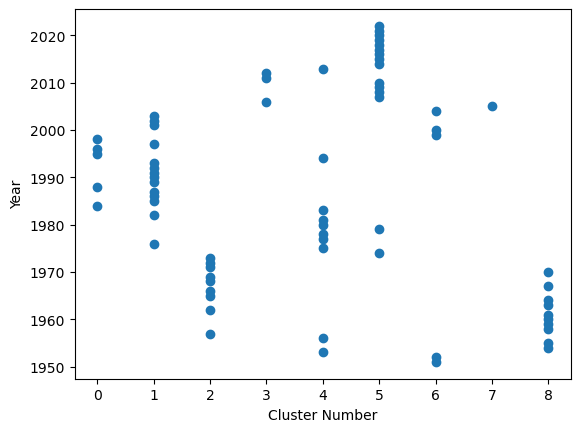

In [276]:
rainfall_clusters
cluster_graph={'Year': [i for i in range(1951,2023)],
              'Cluster' : rainfall_clusters}
cluster_df=pd.DataFrame(cluster_graph)
#cluster_df
plt.xlabel("Cluster Number")
plt.ylabel("Year")
plt.scatter(cluster_df.Cluster,cluster_df.Year)

C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

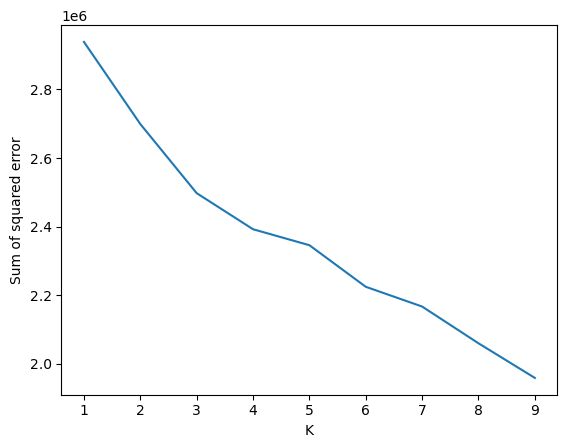

In [279]:
#Finding suitable clusters with elblow technique
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km = KMeans(n_clusters=k,n_init='auto')
    km.fit(rainfall_flattened)
    #Getting sse
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)